In [1]:
insurance <- read.csv('../../R_projects//MLwR/Machine Learning with R (2nd Ed.)//Chapter 06/insurance.csv', stringsAsFactors=TRUE)

In [2]:
str(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 25.7 33.4 27.7 29.8 25.8 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ expenses: num  16885 1726 4449 21984 3867 ...


In [3]:
summary(insurance$expenses)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

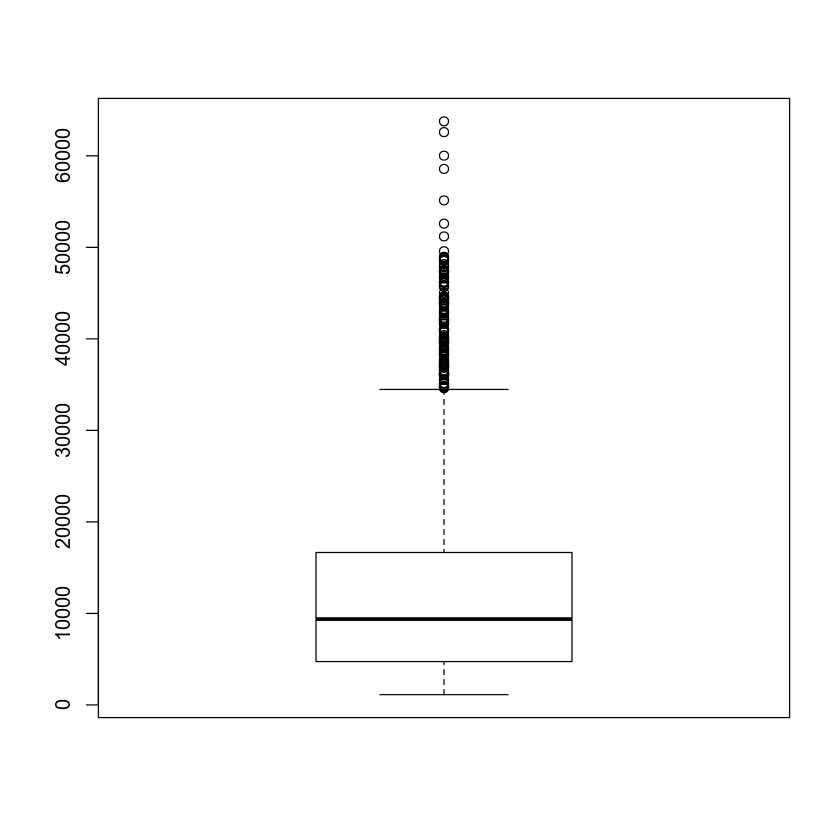

In [4]:
boxplot(insurance$expenses)

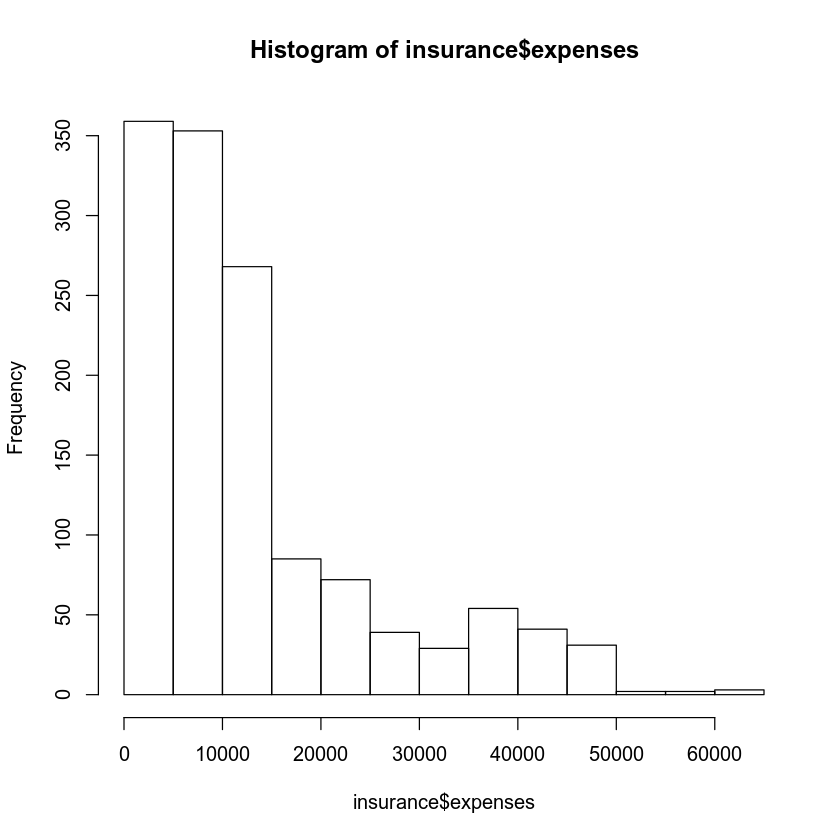

In [5]:
hist(insurance$expenses)

In [6]:
'the distribution of insurance expenses is right-skewed.'

[1] "the distribution of insurance expenses is right-skewed."

In [7]:
3 * ((mean(insurance$expenses) - median(insurance$expenses)) / sd(insurance$expenses))

[1] 0.9632673

In [8]:
table(insurance$region)


northeast northwest southeast southwest 
      324       325       364       325 

In [9]:
cor(insurance[c('age', 'bmi', 'children', 'expenses')])

,age,bmi,children,expenses
age,1.0000000,0.10934101,0.04246900,0.29900819
bmi,0.1093410,1.00000000,0.01264471,0.19857626
children,0.0424690,0.01264471,1.00000000,0.06799823
expenses,0.2990082,0.19857626,0.06799823,1.00000000


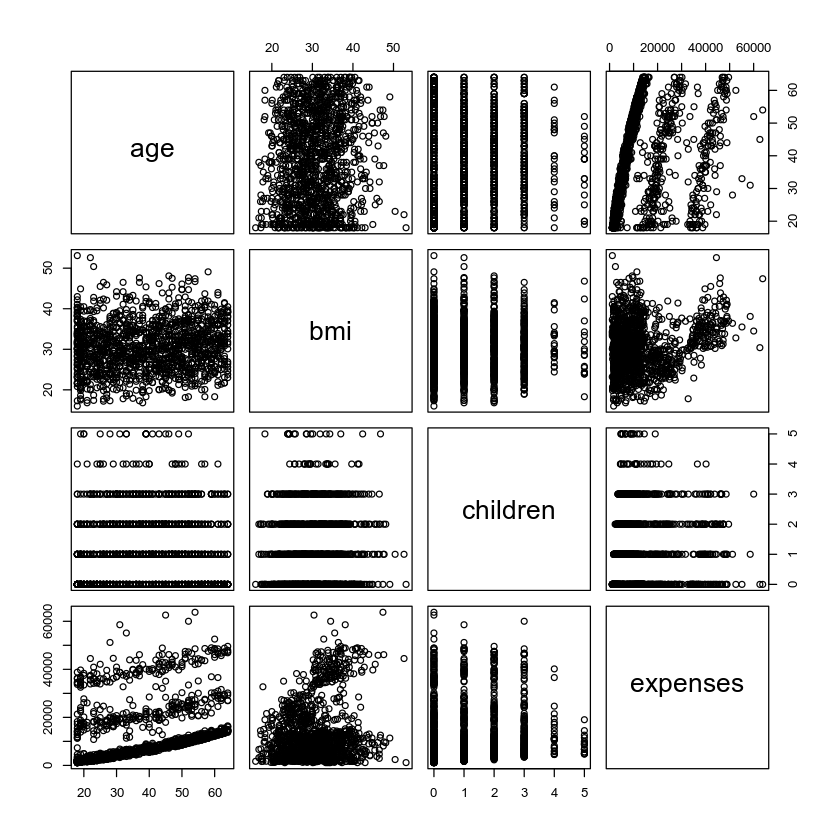

In [10]:
pairs(insurance[c('age', 'bmi', 'children', 'expenses')])

In [11]:
library('psych')

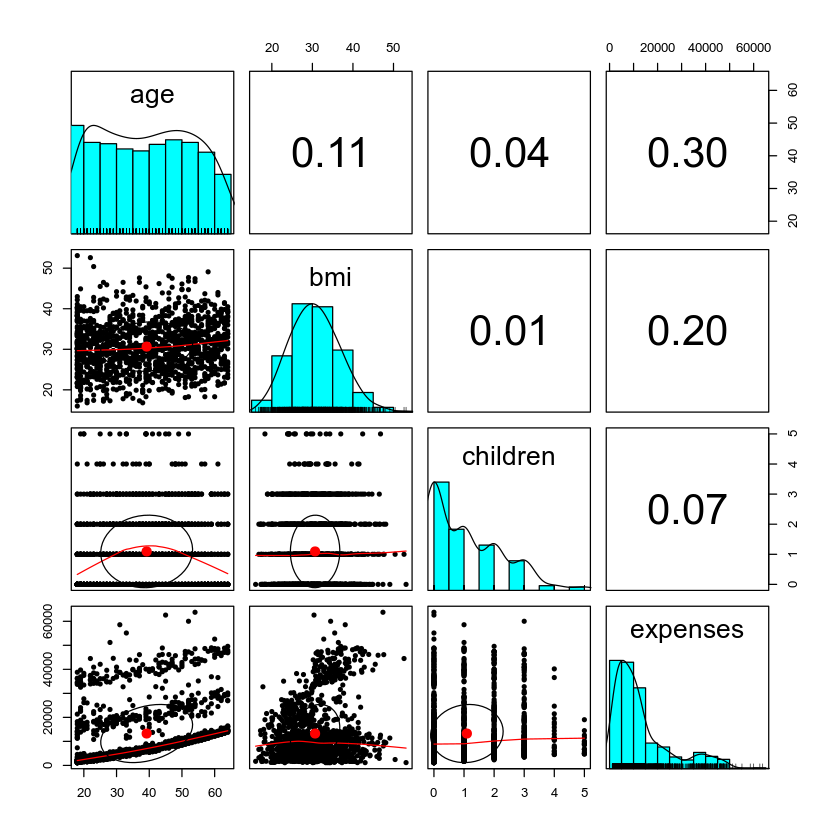

In [12]:
pairs.panels(insurance[c('age', 'bmi', 'children', 'expenses')])

In [13]:
# above diagonal - correlation
# diagonal - histogram of each feature
# oval = correlation ellipse - visualization of correlation strength
# dot at the center - point at the mean values for the x and y vars.
# the more the oval is stretched, the stronger the correlation
# perfect oval - no correlation
# curve (scatterplot) - loess curve - indicates the general 
# relationship between x and y axis variables.
# age/children - red curve - most children owned by the middle-aged

In [14]:
# lm(dv ~ iv, data=mydata)
# dv - dependent variable
# iv - R formula specifying the independent vars in the mydata df
# data specifies the data frame in which the dv and iv vars are found
# returns a regression model
# interactions between ivs can be specified by * operator (or is it?)
# predict(m, test)

In [15]:
# fit a linear regression
ins_model = lm(expenses ~ age + children + bmi + sex + smoker + region,
              data=insurance)

In [16]:
ins_model = lm(expenses ~ ., data=insurance)

In [17]:
ins_model


Call:
lm(formula = expenses ~ ., data = insurance)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -11941.6            256.8           -131.4            339.3  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.7          23847.5           -352.8          -1035.6  
regionsouthwest  
         -959.3  


In [18]:
# intercept is the predicted value of expenses when the independent
# variables are equal to zero. Intercept is often ignored.
# beta coeffs indicate the estimated increase in expenses for an 
# increase of one in each of the features (assuming all other vals
# are held constant). - each new year of age = 256.8$ increase in exp.
# relevel - relative level

In [19]:
summary(ins_model)


Call:
lm(formula = expenses ~ ., data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11941.6      987.8 -12.089  < 2e-16 ***
age                256.8       11.9  21.586  < 2e-16 ***
sexmale           -131.3      332.9  -0.395 0.693255    
bmi                339.3       28.6  11.864  < 2e-16 ***
children           475.7      137.8   3.452 0.000574 ***
smokeryes        23847.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -352.8      476.3  -0.741 0.458976    
regionsoutheast  -1035.6      478.7  -2.163 0.030685 *  
regionsouthwest   -959.3      477.9  -2.007 0.044921 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 1329 DF,  p-value: < 2.2e-16


In [20]:
# residuals - summary for the errors in predictions.
# residual = true_val - pred_val.
# the model under-predicted expenses by 29981.7 for at least 1 obs.
# 50% of the errors fall within 1Q and 3Q
# the majority of predictions were between $2,850.90 over the true val.
# and 1,383.90 under the true value.

# p-value (Pr(>|t|)) provides estimate of the prob. the true coeff. is
# zero given the val. of the estimate.
# low p-vals suggest the true coeff. is unlikely to be zero -
# - feature is likely to have relationship with the dependent var.
# *** - very significant, * - low significance
# if the variable has low p-value, consider excluding it

# multiple R^2 val. (coeff. of determination) provides a measure of how
# well our model as a whole explains the vals. of the dependent var.

In [21]:
# non-linear relationship -> y = a + bx -> y = a + b1x + b2x^2

In [22]:
insurance$age2 = insurance$age^2

In [29]:
insurance$bmi30 = ifelse(insurance$bmi >= 30, 1, 0)

In [30]:
# expenses ~ bmi30*smoker == expenses ~ bmi30 + smokeryes + bmi30 
# + bmi30:smokeryes
# colon: iteraction between two variables

In [31]:
ins_model2 = lm(expenses ~ age + age2 + children + bmi + sex
               + bmi30*smoker + region, data=insurance)

In [32]:
summary(ins_model2)


Call:
lm(formula = expenses ~ age + age2 + children + bmi + sex + bmi30 * 
    smoker + region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-17297.1  -1656.0  -1262.7   -727.8  24161.6 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       139.0053  1363.1359   0.102 0.918792    
age               -32.6181    59.8250  -0.545 0.585690    
age2                3.7307     0.7463   4.999 6.54e-07 ***
children          678.6017   105.8855   6.409 2.03e-10 ***
bmi               119.7715    34.2796   3.494 0.000492 ***
sexmale          -496.7690   244.3713  -2.033 0.042267 *  
bmi30            -997.9355   422.9607  -2.359 0.018449 *  
smokeryes       13404.5952   439.9591  30.468  < 2e-16 ***
regionnorthwest  -279.1661   349.2826  -0.799 0.424285    
regionsoutheast  -828.0345   351.6484  -2.355 0.018682 *  
regionsouthwest -1222.1619   350.5314  -3.487 0.000505 ***
bmi30:smokeryes 19810.1534   604.6769  32.762  < 2e-16 ***

In [ ]:
# accuracy increase. bmi30:smokeryes is more influential than any
# of these alone
# regression trees:
# model numeric data, 
# user does not specify model, 
# uses automatic feature selection (can be used with many features),
# may fit better than linear regression,
# requires a lot of data,
# difficult to determine the overall net effects of individual features
# on the outcome,
# large trees - difficult to interpret

# ND trees don't use entropy, they use variance, sd, absolute deviation.
# or Standard Deviation Reduction (SDR)